In [21]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns

# Thu thập dữ liệu từ nhiều nguồn

In [3]:
# Interaction dataset
file_path = "D:/Download/2019-Oct.csv" 
data_interaction = pd.read_csv(file_path)

print(data_interaction.info())
print(data_interaction.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB
None
                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_code     brand    price    user_

In [ ]:
# Product dataset
file_path = "D:/Download/2019-Oct.csv" 
data_product = pd.read_csv(file_path)

print(data_product.info())
print(data_product.head())

In [ ]:
# Category dataset
file_path = "D:/Download/2019-Oct.csv" 
data_category = pd.read_csv(file_path)

print(data_category.info())
print(data_category.head())

In [ ]:
# User dataset
file_path = "D:/Download/2019-Oct.csv" 
data_user = pd.read_csv(file_path)

print(data_user.info())
print(data_user.head())

# Gán nhãn dữ liệu cho bộ dữ liệu

In [5]:
# Create brand for event_type
# Create column 'interaction' base in 'event_type'
event_type_to_interaction = {
    'view': 1,
    'cart': 2,
    'purchase': 3,
    'remove_from_cart': 4
}

data_interaction['interaction'] = data_interaction['event_type'].map(event_type_to_interaction)

print(data_interaction.info())
print(data_interaction.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
 9   interaction    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.2+ GB
None
                event_time event_type  product_id          category_id  \
0  2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
1  2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
2  2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
3  2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
4  2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   

                         category_cod

# Tiền xử lý dữ liệu

In [11]:
# Check for missing values
print(data_interaction.isnull().sum())

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
interaction             0
dtype: int64


In [12]:
# Delete unused columns (category_code)
data_interaction = data_interaction.drop(columns=['category_code'])
print(data_interaction.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
 8   interaction   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.8+ GB
None


In [14]:
# Handling Missing Values (user_session, brand)
data_interaction = data_interaction.dropna()
print(data_interaction.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36331682 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_time    object 
 1   event_type    object 
 2   product_id    int64  
 3   category_id   int64  
 4   brand         object 
 5   price         float64
 6   user_id       int64  
 7   user_session  object 
 8   interaction   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.7+ GB
None


In [15]:
# Data Type Conversion (event_time, price)
data_interaction['event_time'] = pd.to_datetime(data_interaction['event_time'])
data_interaction['price'] = data_interaction['price'].round(2).astype(float)

print(data_interaction.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36331682 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   category_id   int64              
 4   brand         object             
 5   price         float64            
 6   user_id       int64              
 7   user_session  object             
 8   interaction   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 2.7+ GB
None


In [18]:
# Feature Engineering (day_of_week, hour_of_day)

data_interaction['day_of_week'] = data_interaction['event_time'].dt.dayofweek
data_interaction['hour_of_day'] = data_interaction['event_time'].dt.hour

print(data_interaction.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36331682 entries, 0 to 42448763
Data columns (total 11 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   category_id   int64              
 4   brand         object             
 5   price         float64            
 6   user_id       int64              
 7   user_session  object             
 8   interaction   int64              
 9   day_of_week   int32              
 10  hour_of_day   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(2), int64(4), object(3)
memory usage: 3.0+ GB
None


In [17]:
# Filtering and Aggregating Data

                 event_time event_type  product_id          category_id  \
0 2019-10-01 00:00:00+00:00       view    44600062  2103807459595387724   
1 2019-10-01 00:00:00+00:00       view     3900821  2053013552326770905   
3 2019-10-01 00:00:01+00:00       view     1307067  2053013558920217191   
4 2019-10-01 00:00:04+00:00       view     1004237  2053013555631882655   
5 2019-10-01 00:00:05+00:00       view     1480613  2053013561092866779   

      brand    price    user_id                          user_session  \
0  shiseido    35.79  541312140  72d76fde-8bb3-4e00-8c23-a032dfed738c   
1      aqua    33.20  554748717  9333dfbd-b87a-4708-9857-6336556b0fcc   
3    lenovo   251.74  550050854  7c90fc70-0e80-4590-96f3-13c02c18c713   
4     apple  1081.98  535871217  c6bd7419-2748-4c56-95b4-8cec9ff8b80d   
5    pulser   908.62  512742880  0d0d91c2-c9c2-4e81-90a5-86594dec0db9   

   interaction  day_of_week  hour_of_day  
0            1            1            0  
1            1          

In [19]:
# Train-Test Split

from sklearn.model_selection import train_test_split

# Giả sử dữ liệu của bạn đã được đọc vào DataFrame df
train_data, test_data = train_test_split(data_interaction, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(f'Số lượng mẫu trong tập huấn luyện: {train_data.shape[0]}')
print(f'Số lượng mẫu trong tập kiểm tra: {test_data.shape[0]}')

Số lượng mẫu trong tập huấn luyện: 29065345
Số lượng mẫu trong tập kiểm tra: 7266337


In [ ]:
# Data Normalization

In [ ]:
# Save Processed Data

# Thống kê dữ liệu mẫu

In [20]:
# Basic Descriptive Statistics

print(data_interaction.info())
print(data_interaction.describe())
print(data_interaction.head())

<class 'pandas.core.frame.DataFrame'>
Index: 36331682 entries, 0 to 42448763
Data columns (total 11 columns):
 #   Column        Dtype              
---  ------        -----              
 0   event_time    datetime64[ns, UTC]
 1   event_type    object             
 2   product_id    int64              
 3   category_id   int64              
 4   brand         object             
 5   price         float64            
 6   user_id       int64              
 7   user_session  object             
 8   interaction   int64              
 9   day_of_week   int32              
 10  hour_of_day   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(2), int64(4), object(3)
memory usage: 3.0+ GB
None
         product_id   category_id         price       user_id   interaction  \
count  3.633168e+07  3.633168e+07  3.633168e+07  3.633168e+07  3.633168e+07   
mean   8.666167e+06  2.056650e+18  3.060519e+02  5.336496e+08  1.062667e+00   
std    1.076701e+07  1.728314e+16  3.680569e+

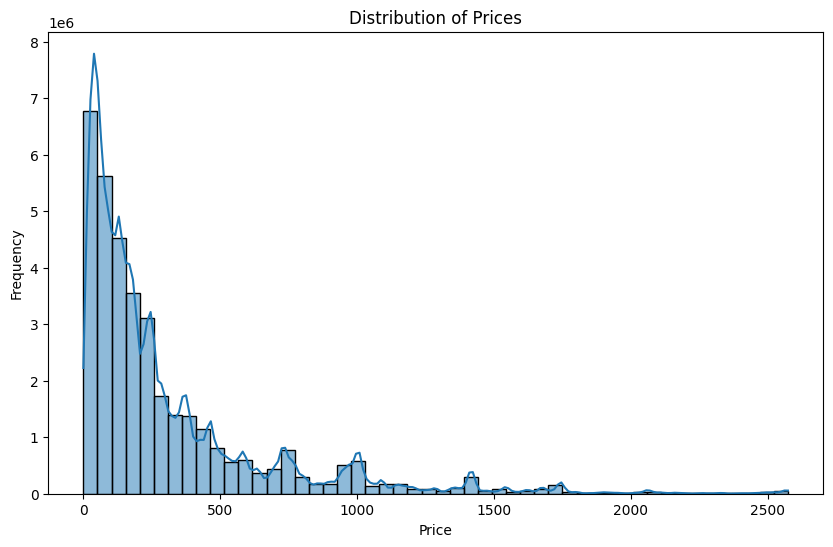

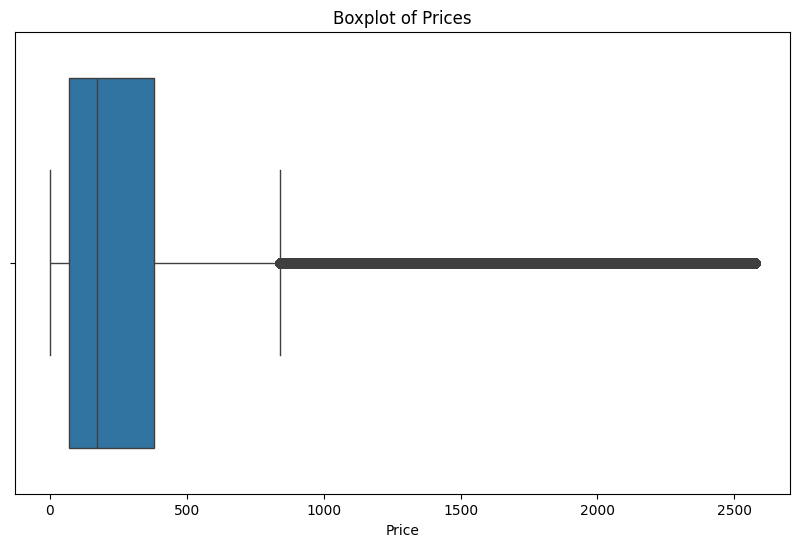

MemoryError: Unable to allocate 277. MiB for an array with shape (36331682,) and data type int64

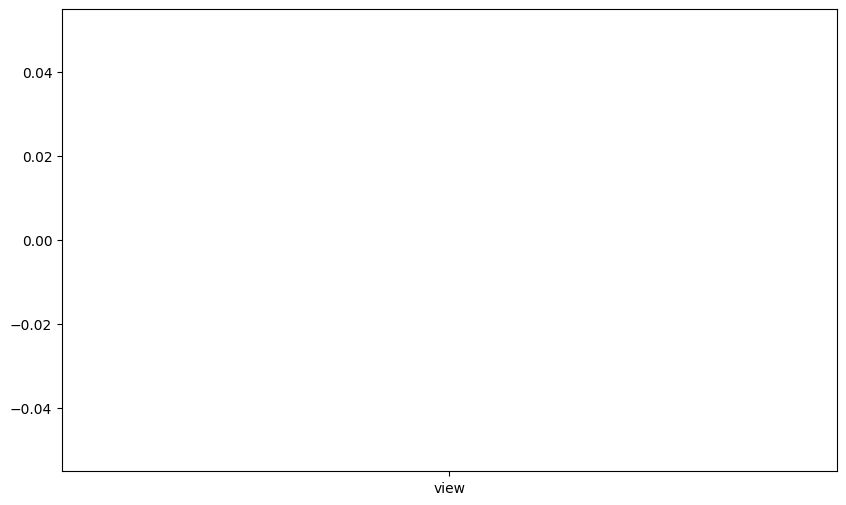

In [23]:
# Distribution Analysis

# Phân tích phân phối cho các cột số
plt.figure(figsize=(10, 6))
sns.histplot(data_interaction['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=data_interaction['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

# Phân tích phân phối cho các cột phân loại
plt.figure(figsize=(10, 6))
sns.countplot(x=data_interaction['event_type'])
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=data_interaction['brand'])
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Xoay nhãn trục x nếu cần thiết
plt.show()

In [ ]:
# Correlation Analysis

In [ ]:
# Outlier Detection

In [ ]:
# Unique Value Analysis

In [ ]:
# Time Series Analysis

# Đề xuất và lựa chọn các tiêu chí đánh giá (về độ chính xác, tốc độ, khả năng ứng dụng,...)

1. Độ chính xác (Accuracy)
Độ chính xác của mô hình gợi ý thường được đánh giá bằng các chỉ số sau:

- Precision: Tỷ lệ giữa số lượng các đề xuất đúng (relevant) và tổng số đề xuất được đưa ra.
- Recall: Tỷ lệ giữa số lượng các đề xuất đúng và tổng số mục tiêu đúng trong dữ liệu thực tế.
- F1 Score: Trung bình điều hòa giữa Precision và Recall, giúp cân bằng giữa hai chỉ số này.
- Mean Average Precision (MAP): Trung bình của Average Precision (AP) cho tất cả các người dùng, đo lường độ chính xác của mô hình khi xem xét nhiều vị trí đề xuất.

2. Độ bao phủ (Coverage)
Độ bao phủ đánh giá khả năng của mô hình trong việc gợi ý nhiều loại sản phẩm khác nhau:

- Item Coverage: Tỷ lệ các sản phẩm được mô hình đề xuất trên tổng số sản phẩm có trong kho dữ liệu.
- User Coverage: Tỷ lệ số người dùng nhận được đề xuất trên tổng số người dùng trong hệ thống.
3. Tốc độ (Speed)
Tốc độ của mô hình là một yếu tố quan trọng, đặc biệt trong các hệ thống trực tuyến:

- Training Time: Thời gian cần thiết để huấn luyện mô hình.
- Inference Time: Thời gian cần thiết để đưa ra đề xuất cho một người dùng cụ thể.
4. Khả năng mở rộng (Scalability)
Khả năng mở rộng của mô hình để xử lý lượng dữ liệu lớn và tăng lên theo thời gian:

- Horizontal Scalability: Khả năng mở rộng mô hình bằng cách thêm nhiều máy chủ hơn.
- Vertical Scalability: Khả năng mở rộng mô hình bằng cách tăng cường tài nguyên cho một máy chủ.
5. Khả năng ứng dụng (Usability)
Khả năng triển khai và tích hợp mô hình vào hệ thống hiện tại:

- Integration Ease: Mức độ dễ dàng trong việc tích hợp mô hình vào hệ thống hiện có.
- Interoperability: Khả năng của mô hình hoạt động tốt với các công nghệ và hệ thống khác.
6. Trải nghiệm người dùng (User Experience)
Đánh giá sự hài lòng của người dùng khi sử dụng hệ thống gợi ý:

- User Satisfaction: Mức độ hài lòng của người dùng với các đề xuất.
- Engagement Metrics: Số lần nhấp chuột, thời gian ở lại trên trang, và các chỉ số tương tác khác.
7. Độ linh hoạt (Flexibility)
Khả năng của mô hình trong việc điều chỉnh và cập nhật theo thời gian:

- Adaptability: Khả năng mô hình thích ứng với thay đổi trong dữ liệu và yêu cầu của người dùng.
- Customization: Khả năng điều chỉnh mô hình để phù hợp với các trường hợp sử dụng cụ thể của doanh nghiệp.
8. Độ tin cậy và ổn định (Reliability and Stability)
Khả năng của mô hình hoạt động ổn định và đáng tin cậy trong mọi điều kiện:

- Robustness: Khả năng của mô hình chịu đựng được các thay đổi và biến động trong dữ liệu.
- Stability: Mức độ ổn định của các kết quả đề xuất qua các lần chạy khác nhau của mô hình.

# Thống kê và phân tích lỗi

# Mô hình 1: Collaborative Filtering dựa trên SVD

In [20]:
# Create the user-item interaction matrix
user_item_matrix = data_interaction_v1.pivot_table(index='user_id', columns='product_id', values='price', aggfunc='sum', fill_value=0)

# Convert to numpy array
R = user_item_matrix.values

# Normalize the user-item matrix (subtract mean of each user's interactions)
user_ratings_mean = np.mean(R, axis=1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

c:\Users\tduca\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 1588842178 is out of bounds for axis 0 with size 1588664628

In [ ]:
# Perform Singular Value Decomposition
U, sigma, Vt = svds(R_demeaned, k=50)

# Convert sigma to diagonal matrix form
sigma = np.diag(sigma)